In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os


import warnings
warnings.filterwarnings('ignore')

## Importing and understanding our dataset 

In [110]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [111]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [112]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [113]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1


#### Description

In [114]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Let's understand our columns better:

In [116]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 2 = fixed defect; 1 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 2 = fixed defect; 1 = reversable defect


#### Analysing the 'target' variable

In [117]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [118]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [119]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


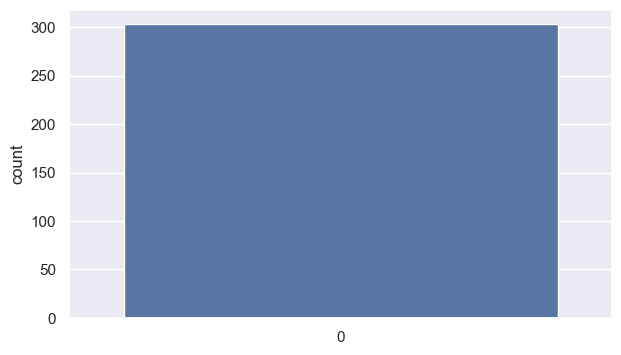

In [171]:
y = dataset["target"]
sns.set(rc={'figure.figsize':(7,4)})
sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [121]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))



Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [122]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

<AxesSubplot: xlabel='sex', ylabel='target'>

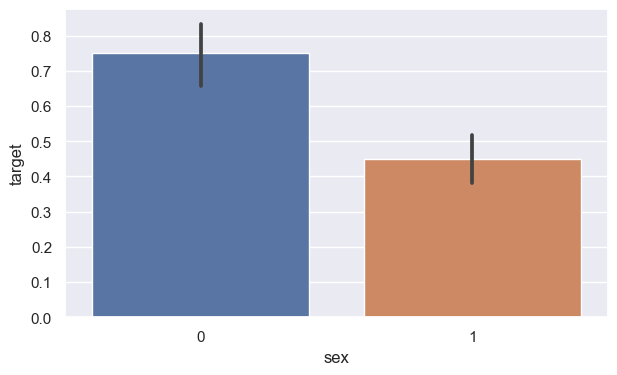

In [170]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x = dataset["sex"], y = y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [124]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

<AxesSubplot: xlabel='cp', ylabel='target'>

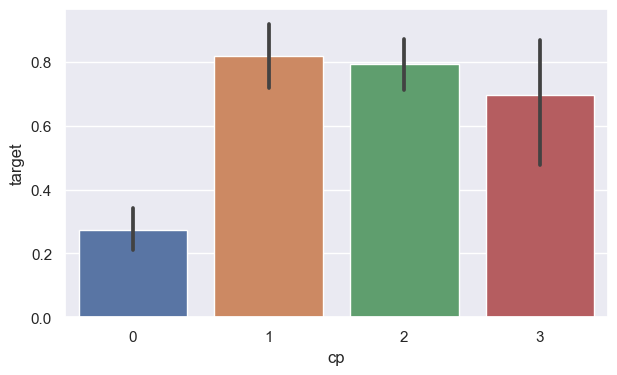

In [169]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x = dataset["cp"],y = y)

##### 0 - Typical Angina

### Analysing the FBS feature

In [126]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [127]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<AxesSubplot: xlabel='fbs', ylabel='target'>

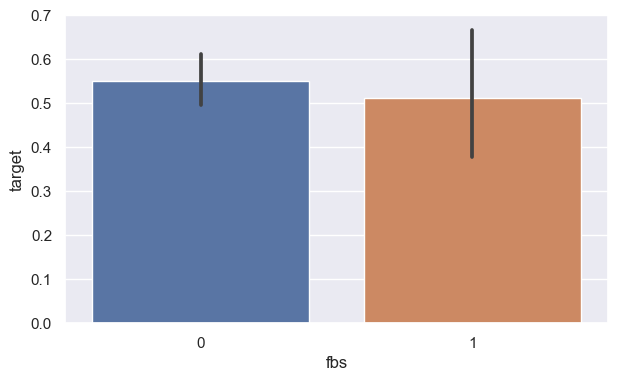

In [168]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x = dataset["fbs"],y = y)

### Analysing the restecg feature

In [129]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot: xlabel='restecg', ylabel='target'>

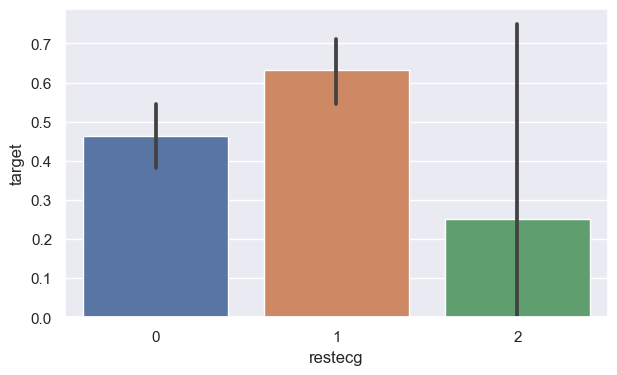

In [167]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x = dataset["restecg"], y = y)

### Analysing the 'exang' feature

In [131]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot: xlabel='exang', ylabel='target'>

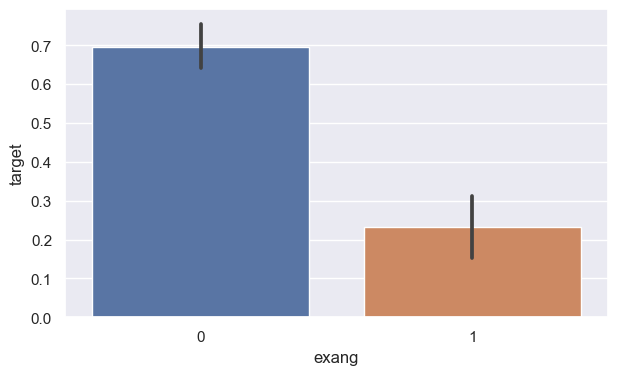

In [166]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x = dataset["exang"],y = y)

### Analysing the Slope feature

In [133]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot: xlabel='slope', ylabel='target'>

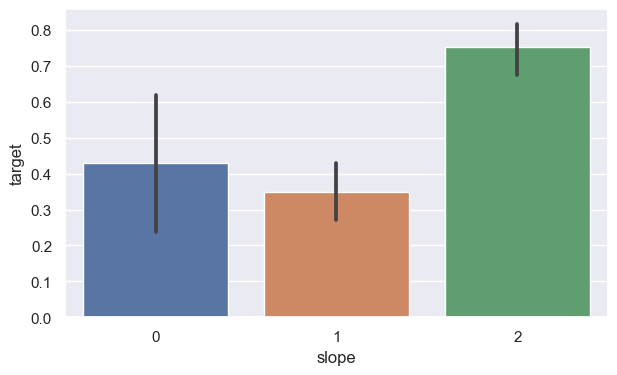

In [165]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x = dataset["slope"],y = y)

### Analysing the 'ca' feature

In [135]:
#number of major vessels (0-3) colored by flourosopy

In [136]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot: ylabel='count'>

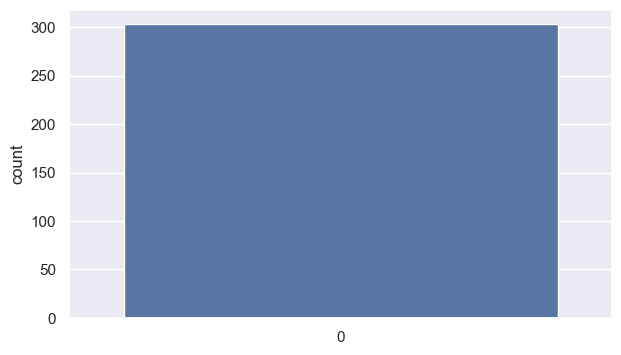

In [164]:
sns.set(rc={'figure.figsize':(7,4)})
sns.countplot(dataset["ca"])

<AxesSubplot: xlabel='ca', ylabel='target'>

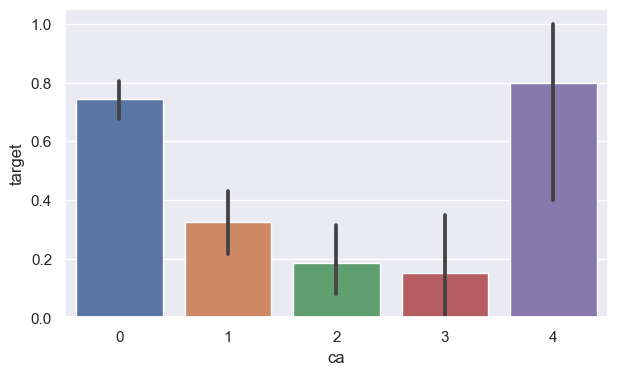

In [163]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x = dataset["ca"],y= y)

In [139]:
### Analysing the 'thal' feature
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot: xlabel='thal', ylabel='target'>

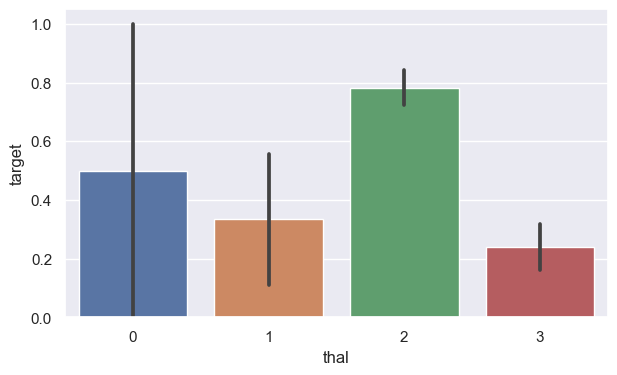

In [162]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x = dataset["thal"],y = y)

<AxesSubplot: xlabel='thal', ylabel='Density'>

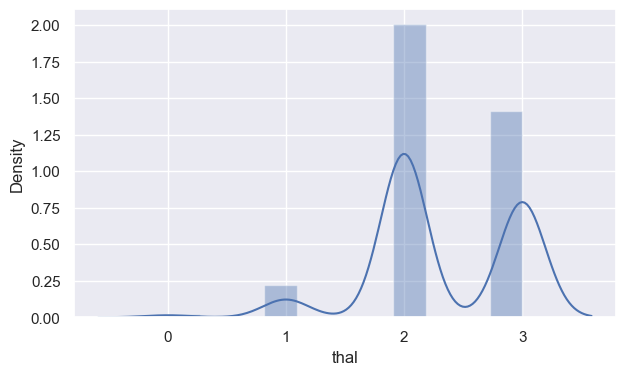

In [161]:
sns.set(rc={'figure.figsize':(7,4)})
sns.distplot(dataset["thal"])

## Data Splitting

In [142]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [143]:
X_train.shape

(242, 13)

In [144]:
X_test.shape

(61, 13)

In [145]:
Y_train.shape

(242,)

In [146]:
Y_test.shape

(61,)

## Model Fitting

In [147]:
from sklearn.metrics import accuracy_score

### SVM

In [148]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [149]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [151]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [153]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 90.16 %


### XGBoost

In [154]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)


In [155]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


In [156]:
scores = [score_svm,score_dt,score_rf,score_xgb]
algorithms = ["Support Vector Machine","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 78.69 %


<AxesSubplot: xlabel='Algorithms', ylabel='Accuracy score'>

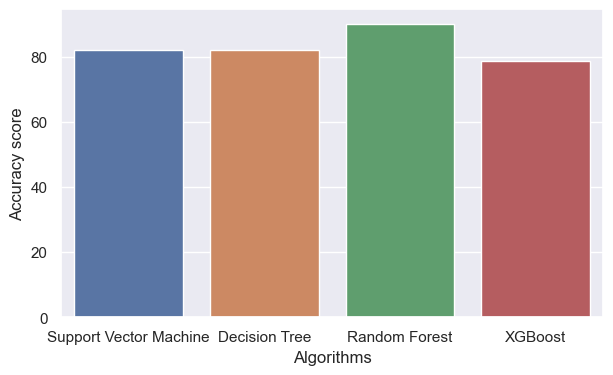

In [160]:
sns.set(rc={'figure.figsize':(7,4)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x = algorithms,y= scores)